#### Final Exam

<img src="https://user-images.githubusercontent.com/55968160/76005221-95033000-5ebf-11ea-8a5d-4b9a2651b803.png" width="300" height="300" />

**For the Ozone data from the R package mlbench try the following machine learning prediction algorithm. Read the paper Feature Selection with the Boruta Package and implement the algorithm.
Build prediction model for the Ozone variable. Which features are most important?**
* **1. Boruta RandomForest Algorithm**

**NAME: SAJITH GOWTHAMAN**
**NET ID: ek5282**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Ozone.csv")

In [3]:
df.head()

Unnamed: 0  V1  V2  V3   V4      V5  V6    V7    V8     V9     V10   V11  \
0           1   1   1   4  3.0  5480.0   8  20.0   NaN    NaN  5000.0 -15.0   
1           2   1   2   5  3.0  5660.0   6   NaN  38.0    NaN     NaN -14.0   
2           3   1   3   6  3.0  5710.0   4  28.0  40.0    NaN  2693.0 -25.0   
3           4   1   4   7  5.0  5700.0   3  37.0  45.0    NaN   590.0 -24.0   
4           5   1   5   1  5.0  5760.0   3  51.0  54.0  45.32  1450.0  25.0   

     V12  V13  
0  30.56  200  
1    NaN  300  
2  47.66  250  
3  55.04  100  
4  57.02   60

In [4]:
df.isna().sum()

Unnamed: 0      0
V1              0
V2              0
V3              0
V4              5
V5             12
V6              0
V7             15
V8              2
V9            139
V10            15
V11             1
V12            14
V13             0
dtype: int64

### We find a lot of NaN values associated with the data. For a prediction model, it is advised to take the mean of the values of it's respective columns. As this particular data deals with the temperature, we shouldn't expect sudden ups and downs of the values. Mean value would be suitable.

In [5]:
df.mean()

Unnamed: 0     183.500000
V1               6.513661
V2              15.756831
V3               4.002732
V4              11.526316
V5            5752.966102
V6               4.868852
V7              58.475783
V8              61.914835
V9              56.846344
V10           2590.943020
V11             17.797260
V12             60.927330
V13            123.300546
dtype: float64

In [6]:
df.fillna(df.mean(), inplace = True)

**Let's check the predicting target's data, whether we can do a classification or regression model.**

In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 14 columns):
Unnamed: 0    366 non-null int64
V1            366 non-null int64
V2            366 non-null int64
V3            366 non-null int64
V4            366 non-null float64
V5            366 non-null float64
V6            366 non-null int64
V7            366 non-null float64
V8            366 non-null float64
V9            366 non-null float64
V10           366 non-null float64
V11           366 non-null float64
V12           366 non-null float64
V13           366 non-null int64
dtypes: float64(8), int64(6)
memory usage: 40.2 KB


Unnamed: 0          V1          V2          V3          V4  \
count  366.000000  366.000000  366.000000  366.000000  366.000000   
mean   183.500000    6.513661   15.756831    4.002732   11.526316   
std    105.799338    3.455958    8.823592    1.997942    7.861472   
min      1.000000    1.000000    1.000000    1.000000    1.000000   
25%     92.250000    4.000000    8.000000    2.000000    5.000000   
50%    183.500000    7.000000   16.000000    4.000000   10.000000   
75%    274.750000    9.750000   23.000000    6.000000   16.000000   
max    366.000000   12.000000   31.000000    7.000000   38.000000   

                V5          V6          V7          V8          V9  \
count   366.000000  366.000000  366.000000  366.000000  366.000000   
mean   5752.966102    4.868852   58.475783   61.914835   56.846344   
std     103.253719    2.116928   19.348962   14.237358    9.173890   
min    5320.000000    0.000000   19.000000   25.000000   27.680000   
25%    5700.000000    3.000000   50.000000   51.250000   54.320000   
50%    5760.000000    5.000000   64.000000   62.000000   56.846344   
75%    5830.000000    6.000000   73.000000   72.000000   59.990000   
max    5950.000000   11.000000   93.000000   93.000000   82.580000   

               V10         V11         V12         V13  
count   366.000000  366.000000  366.000000  366.000000  
mean   2590.943020   17.797260   60.927330  123.300546  
std    1759.520751   36.061021   13.602462   80.280142  
min     111.000000  -69.000000   27.500000    0.000000  
25%     899.000000   -9.750000   51.620000   70.000000  
50%    2380.000000   24.000000   61.160000  110.000000  
75%    5000.000000   45.000000   70.340000  150.000000  
max    5000.000000  107.000000   91.760000  500.000000

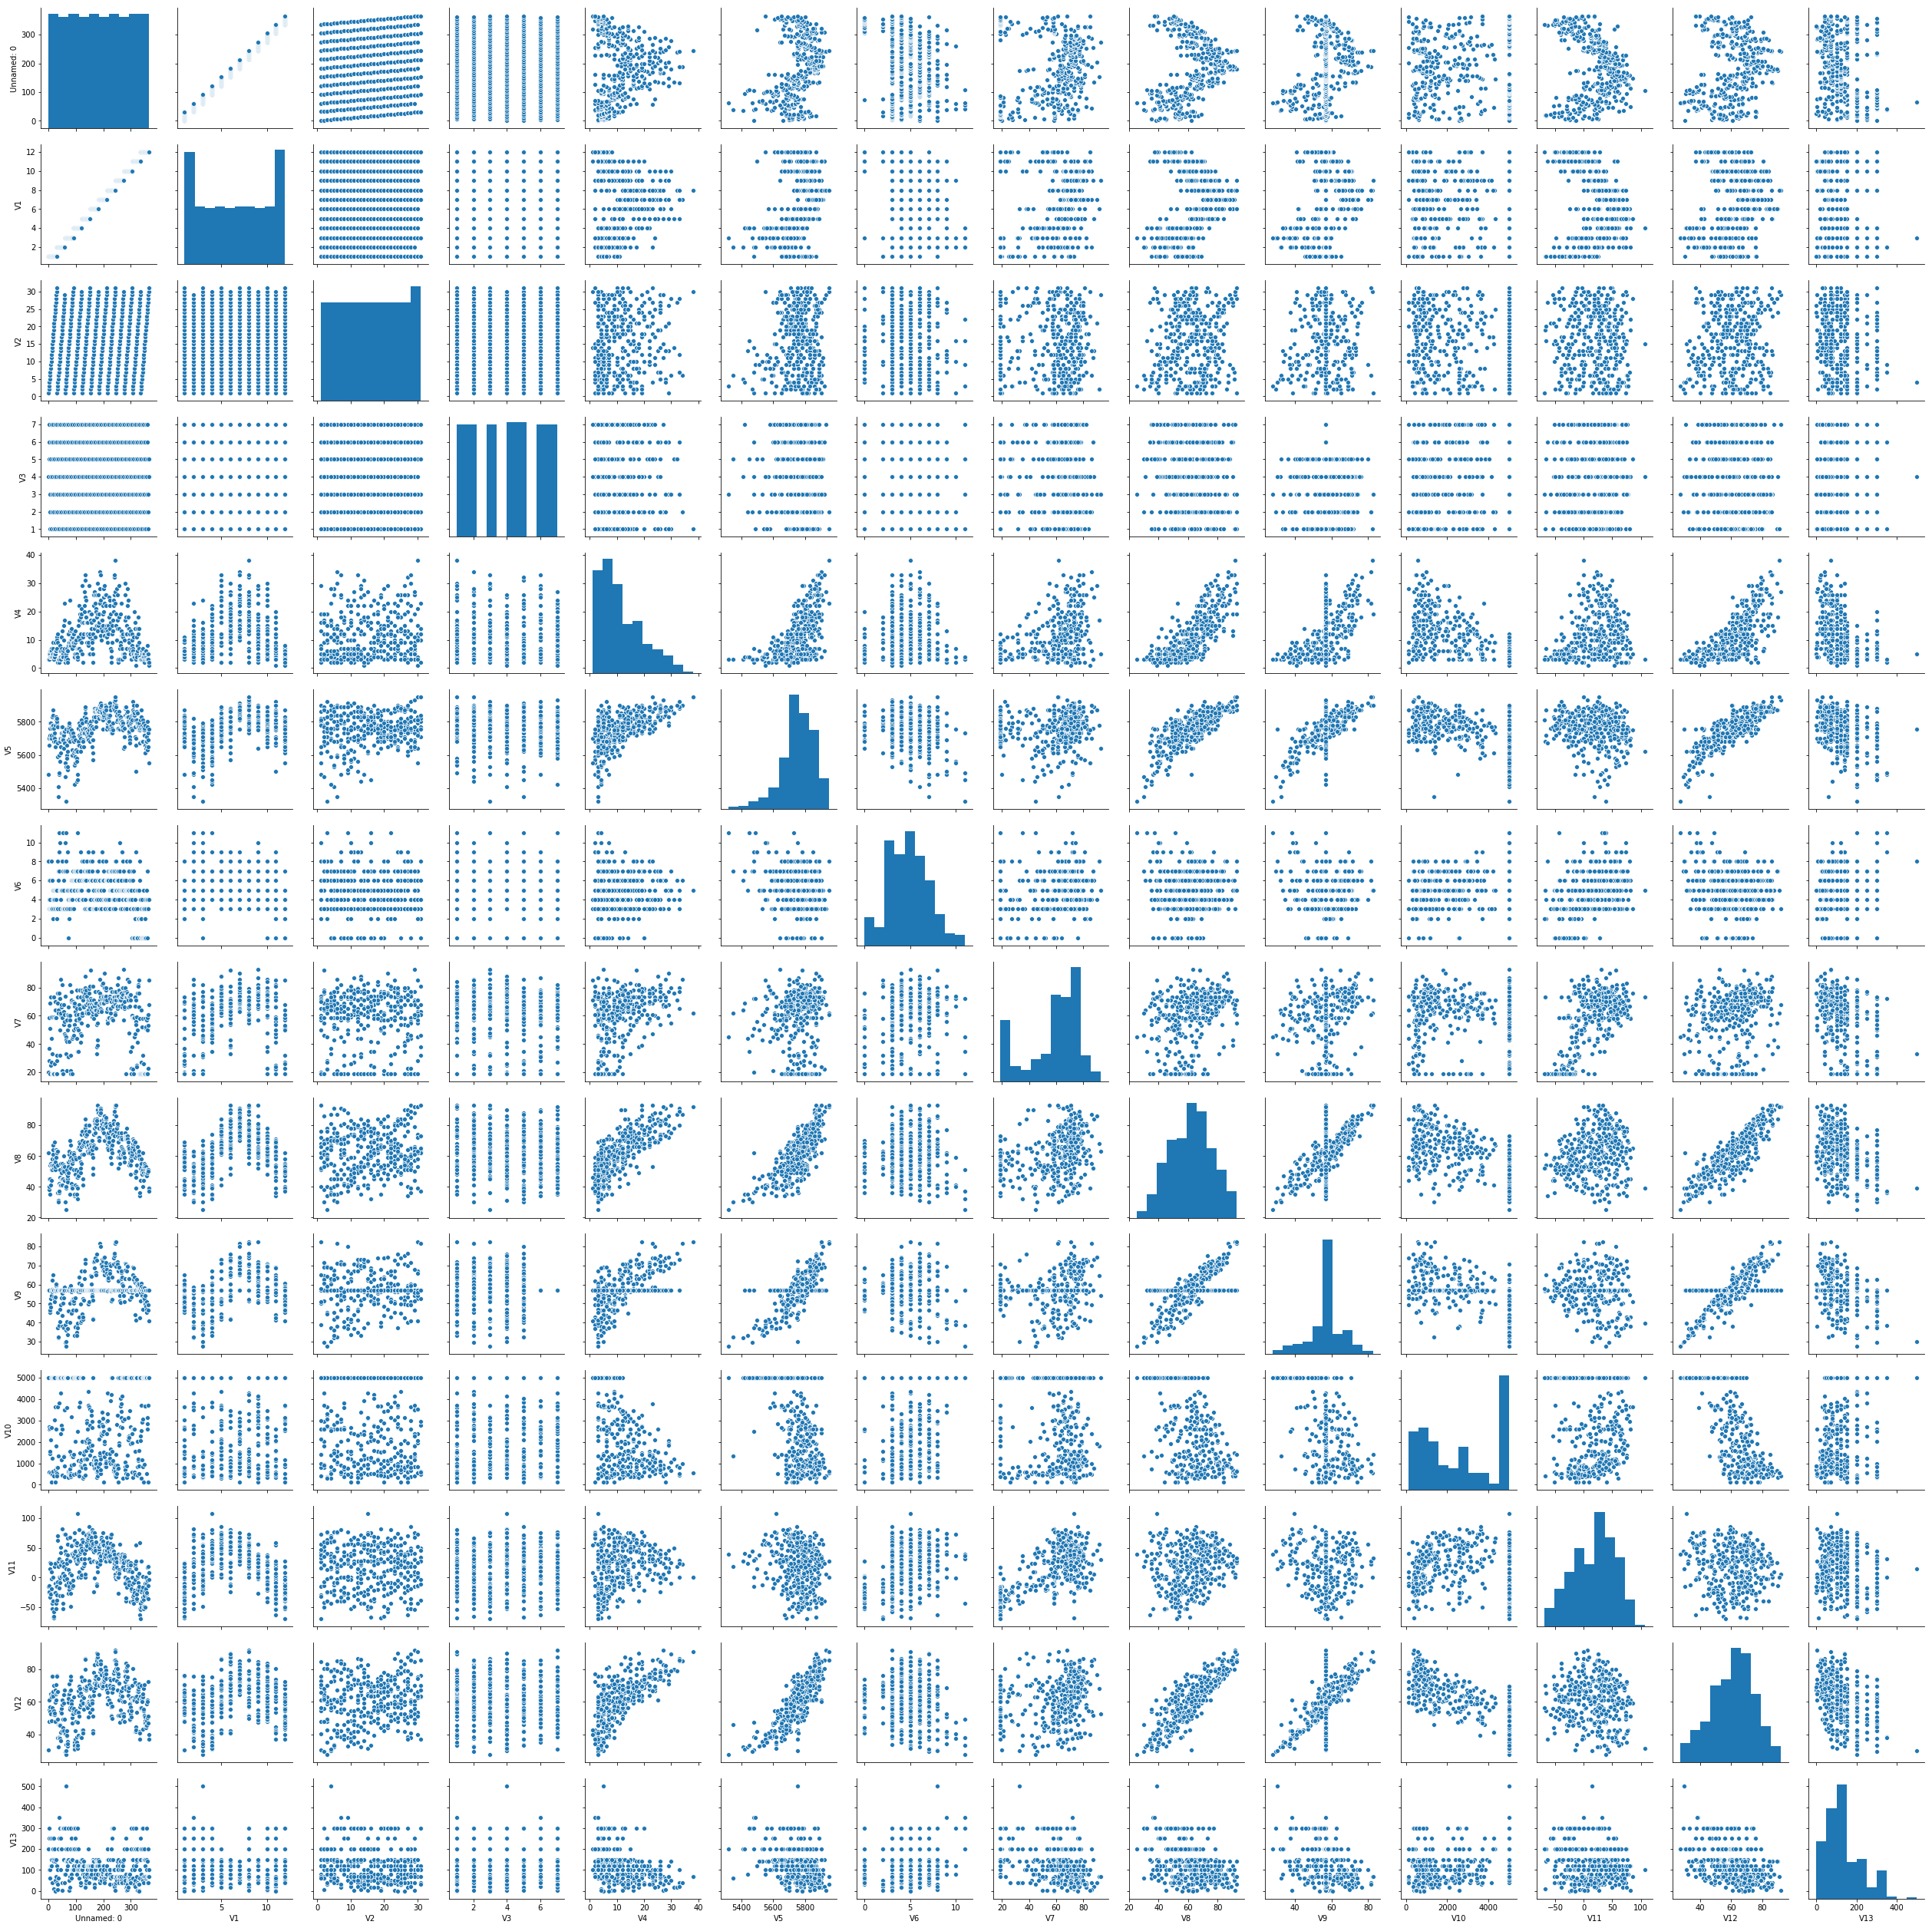

In [8]:
sns.pairplot(df)

In [9]:
df.V4 = round(df.V4)
df.V4 = pd.to_numeric(df['V4'])

In [10]:
df.V4.unique()

array([ 3.,  5.,  6.,  4.,  7.,  9., 11., 10., 12.,  2.,  8., 13., 15.,
       23., 17., 16., 24., 14., 22., 19., 18., 21., 29., 20., 27., 33.,
       25., 31., 26., 30., 28., 34., 32., 38.,  1.])

In [11]:
##Let's Load X and Y

X=df.loc[:, df.columns != 'V4'].values
Y=df.iloc[:,4].values.ravel()

## Boruta Model (with Random Forest):

In [12]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
rf = RandomForestClassifier(n_jobs=-1, class_weight=None, max_depth=2)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, max_iter = 30)

# find all relevant features
feat_selector.fit(X, Y)

# check ranking of features
feat_selector.ranking_

Iteration: 	1 / 30
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	2 / 30
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	3 / 30
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	4 / 30
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	5 / 30
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	6 / 30
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	7 / 30
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	8 / 30
Confirmed: 	7
Tentative: 	4
Rejected: 	2
Iteration: 	9 / 30
Confirmed: 	7
Tentative: 	4
Rejected: 	2
Iteration: 	10 / 30
Confirmed: 	7
Tentative: 	4
Rejected: 	2
Iteration: 	11 / 30
Confirmed: 	7
Tentative: 	4
Rejected: 	2
Iteration: 	12 / 30
Confirmed: 	7
Tentative: 	4
Rejected: 	2
Iteration: 	13 / 30
Confirmed: 	7
Tentative: 	4
Rejected: 	2
Iteration: 	14 / 30
Confirmed: 	7
Tentative: 	4
Rejected: 	2
Iteration: 	15 / 30
Confirmed: 	7
Tentative: 	4
Rejected: 	2
Iteration: 	16 / 30
Confirmed: 	9
Tentative: 	2
Rejected: 	2
Iteration: 	17 / 30
Confir

array([1, 1, 2, 4, 1, 3, 1, 1, 1, 1, 1, 1, 1])

In [13]:
feat_selector.support_

array([ True,  True, False, False,  True, False,  True,  True,  True,
        True,  True,  True,  True])

In [14]:
print('==============BORUTA==============')
print (feat_selector.n_features_)

==============BORUTA==============
10


### I was first getting the top 4 important features. After some tuning I was able to get the all the important features. (Same when I ran with R-Studio)

In [15]:
features = [f for f in df.columns if f not in ['V4']]
len(features)

13

In [16]:
important_features = list()
indexes = np.where(feat_selector.support_ == True)
for x in np.nditer(indexes):
    important_features.append(features[x])
print('The Most Important Features Are:{}'.format(important_features))

unimportant_features = list()
indexes = np.where(feat_selector.support_ == False)
for x in np.nditer(indexes):
    unimportant_features.append(features[x])
print('The Unimportant Features Are:{}'.format(unimportant_features))

The Most Important Features Are:['Unnamed: 0', 'V1', 'V5', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13']
The Unimportant Features Are:['V2', 'V3', 'V6']


### Dataset before filtering to the transformed version: 

In [17]:
imp_df = pd.DataFrame(df[important_features])
imp_df

Unnamed: 0  V1           V5         V7         V8         V9         V10  \
0             1   1  5480.000000  20.000000  61.914835  56.846344  5000.00000   
1             2   1  5660.000000  58.475783  38.000000  56.846344  2590.94302   
2             3   1  5710.000000  28.000000  40.000000  56.846344  2693.00000   
3             4   1  5700.000000  37.000000  45.000000  56.846344   590.00000   
4             5   1  5760.000000  51.000000  54.000000  45.320000  1450.00000   
..          ...  ..          ...        ...        ...        ...         ...   
361         362  12  5730.000000  53.000000  51.000000  49.280000   111.00000   
362         363  12  5690.000000  23.000000  51.000000  49.280000  5000.00000   
363         364  12  5650.000000  61.000000  50.000000  46.580000  3704.00000   
364         365  12  5550.000000  85.000000  39.000000  41.000000  5000.00000   
365         366  12  5752.966102  68.000000  37.000000  56.846344  5000.00000   

      V11       V12  V13  
0   -15.0  30.56000  200  
1   -14.0  60.92733  300  
2   -25.0  47.66000  250  
3   -24.0  55.04000  100  
4    25.0  57.02000   60  
..    ...       ...  ...  
361 -14.0  72.50000  200  
362 -36.0  51.26000   70  
363  18.0  46.94000   40  
364   8.0  39.92000  100  
365  -3.0  37.22000   70  

[366 rows x 10 columns]

## The most important features were found to be 'Unnamed: 0', 'V1', 'V5', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12' and 'V13'

In [18]:
#call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(X)
X_filtered.shape

(366, 10)

In [19]:
X_filtered_df = pd.DataFrame(X_filtered)

## Dataset after transofrming to the selected features
#### Perfect, it looks exactly like the expected results! (compared to the one before transforming)

In [20]:
X_filtered_df

0     1            2          3          4          5           6  \
0      1.0   1.0  5480.000000  20.000000  61.914835  56.846344  5000.00000   
1      2.0   1.0  5660.000000  58.475783  38.000000  56.846344  2590.94302   
2      3.0   1.0  5710.000000  28.000000  40.000000  56.846344  2693.00000   
3      4.0   1.0  5700.000000  37.000000  45.000000  56.846344   590.00000   
4      5.0   1.0  5760.000000  51.000000  54.000000  45.320000  1450.00000   
..     ...   ...          ...        ...        ...        ...         ...   
361  362.0  12.0  5730.000000  53.000000  51.000000  49.280000   111.00000   
362  363.0  12.0  5690.000000  23.000000  51.000000  49.280000  5000.00000   
363  364.0  12.0  5650.000000  61.000000  50.000000  46.580000  3704.00000   
364  365.0  12.0  5550.000000  85.000000  39.000000  41.000000  5000.00000   
365  366.0  12.0  5752.966102  68.000000  37.000000  56.846344  5000.00000   

        7         8      9  
0   -15.0  30.56000  200.0  
1   -14.0  60.92733  300.0  
2   -25.0  47.66000  250.0  
3   -24.0  55.04000  100.0  
4    25.0  57.02000   60.0  
..    ...       ...    ...  
361 -14.0  72.50000  200.0  
362 -36.0  51.26000   70.0  
363  18.0  46.94000   40.0  
364   8.0  39.92000  100.0  
365  -3.0  37.22000   70.0  

[366 rows x 10 columns]

**Let's check how the boruta model has changed the distribution of the 10 variables with HvPlot**

In [21]:
import hvplot.pandas
import holoviews as hv

(X_filtered_df.hvplot(kind='scatter', x='0', y='1', by='0') + X_filtered_df.hvplot(kind='scatter', x='0', y='1', by='1') + X_filtered_df.hvplot(kind='scatter', x='0', y='1', by='1')) 

:Layout
   .NdOverlay.I   :NdOverlay   [0]
      :Scatter   [0]   (1)
   .NdOverlay.II  :NdOverlay   [1]
      :Scatter   [0]   (1)
   .NdOverlay.III :NdOverlay   [1]
      :Scatter   [0]   (1)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import ensemble

X = imp_df
Y= df.V4

In [25]:
df_rf_clf = ensemble.RandomForestClassifier(n_estimators=23)
df_rf_clf.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=23,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [26]:
predictions = df_rf_clf.predict(X)

### Predictions For "Ozone" Variable:

In [28]:
predictions

array([ 3.,  3.,  3.,  5.,  5.,  6.,  4.,  4.,  6.,  7.,  4.,  6.,  5.,
        4.,  4.,  7.,  5.,  9.,  4.,  3.,  4.,  4.,  5.,  6.,  9.,  5.,
        6.,  6.,  6., 11., 10.,  7., 12.,  9.,  2.,  3.,  3.,  2.,  3.,
        3.,  4.,  6.,  8.,  6.,  4.,  3.,  7., 11., 13.,  4.,  6.,  5.,
        4.,  4.,  6., 10., 15., 23., 17.,  7.,  2.,  3.,  3.,  5.,  4.,
        6.,  7.,  7.,  6.,  3.,  2.,  8., 12., 12., 16.,  9., 24., 13.,
        8., 10.,  8.,  9., 10., 13., 14.,  9., 11.,  7.,  9., 12., 12.,
        8.,  9.,  5.,  4.,  4.,  9., 13.,  5., 10., 10.,  7.,  5.,  4.,
        7.,  3.,  3.,  7., 11., 15., 22., 17.,  7., 10., 19., 18., 12.,
        6.,  9., 19., 21., 29., 16.,  5., 11.,  2.,  2., 12., 16., 22.,
       20., 27., 33., 25., 31., 18., 16., 24., 16., 12.,  9., 12., 16.,
       12.,  8.,  9., 29., 20.,  5.,  5., 11., 12., 19., 17., 19., 16.,
       14., 10.,  9.,  7.,  5.,  2., 12., 22., 17., 26., 27., 14., 11.,
       23., 26., 21., 15., 20., 15., 18., 26., 19., 13., 30., 26